In [74]:
#  Time Series Predicition using Deep Learning With  LSTM
#  ------------------------------------------------------

In [73]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as  tf

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [6]:
df = pd.read_csv('/retail_sales_Time_series.csv')
df

,Date,Sales
0,1/1/15 0:00,54.048619
1,1/1/15 1:00,50.161596
2,1/1/15 2:00,55.954939
3,1/1/15 3:00,56.553261
4,1/1/15 4:00,60.487874
...,...,...
52580,30/12/20 20:00,140.946779
52581,30/12/20 21:00,145.561324
52582,30/12/20 22:00,144.484071
52583,30/12/20 23:00,147.890291


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    52585 non-null  datetime64[ns]
 1   Sales   52585 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 821.8 KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

<ipython-input-8-45a55d54a14d>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
<ipython-input-8-45a55d54a14d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


array([<Axes: xlabel='Date'>], dtype=object)

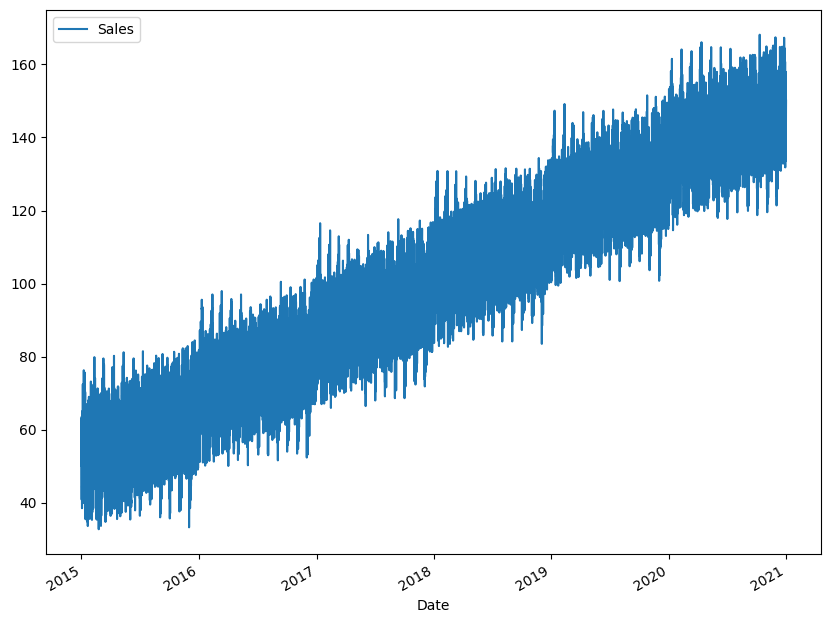

In [70]:
df.set_index('Date')[['Sales']].plot(subplots=True)

<Axes: >

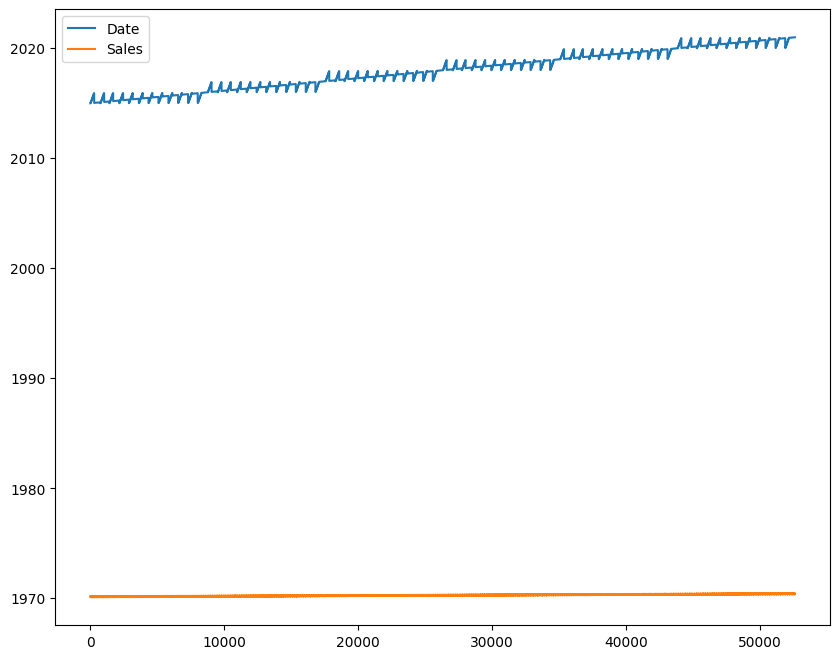

In [17]:
df.plot(figsize=(10,8))

In [18]:
df_input=df[['Sales']]
df_input

,Sales
0,54.048619
1,50.161596
2,55.954939
3,56.553261
4,60.487874
...,...
52580,140.946779
52581,145.561324
52582,144.484071
52583,147.890291


In [19]:
df_input.describe()

,Sales
count,52585.000000
mean,99.997488
std,29.957815
min,32.790074
25%,75.017795
50%,99.930643
75%,124.990608
max,168.107281


In [22]:
df_input.query('Sales>124')

,Sales
29788,124.743962
29957,124.001466
30270,124.192547
30435,124.755691
30461,124.150965
...,...
52580,140.946779
52581,145.561324
52582,144.484071
52583,147.890291


In [23]:
scaler =MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [24]:
data_scaled98

array([[0.15710157],
       [0.1283763 ],
       [0.17118935],
       ...,
       [0.82542345],
       [0.85059557],
       [0.86783799]])

In [25]:
features=data_scaled
target=data_scaled[:,0]

In [29]:
TimeseriesGenerator(features,target, length=2,sampling_rate=1,batch_size=1)[0]

(array([[[0.15710157],
         [0.1283763 ]]]),
 array([0.17118935]))

In [38]:
x_train, x_test, y_train, y_test  = train_test_split(features ,target, test_size=0.20, random_state=125, shuffle=False)

In [39]:
x_train.shape

(42068, 1)

In [40]:
X_test.shape

(10517, 1)

In [41]:
win_length = 250
batch_size = 32
num_features = 1
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test , y_test, length=win_length, sampling_rate=1,batch_size=batch_size)

In [42]:
train_generator[0]

(array([[[0.15710157],
         [0.1283763 ],
         [0.17118935],
         ...,
         [0.18276762],
         [0.22175255],
         [0.20120757]],
 
        [[0.1283763 ],
         [0.17118935],
         [0.17561098],
         ...,
         [0.22175255],
         [0.20120757],
         [0.14312201]],
 
        [[0.17118935],
         [0.17561098],
         [0.20468793],
         ...,
         [0.20120757],
         [0.14312201],
         [0.15166137]],
 
        ...,
 
        [[0.22315337],
         [0.24572904],
         [0.22854168],
         ...,
         [0.10166027],
         [0.06828254],
         [0.06927693]],
 
        [[0.24572904],
         [0.22854168],
         [0.2129003 ],
         ...,
         [0.06828254],
         [0.06927693],
         [0.0739013 ]],
 
        [[0.22854168],
         [0.2129003 ],
         [0.22877846],
         ...,
         [0.06927693],
         [0.0739013 ],
         [0.01741361]]]),
 array([0.14312201, 0.15166137, 0.1125318 , 0.10310585,

In [46]:
model =tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (win_length,num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.Dense(1))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250, 128)          66560     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 250, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 250, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 250, 128)          0         
                                                                 
 dropout (Dropout)           (None, 250, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0

In [48]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode = 'min')

model.compile(loss= tf.losses.MeanSquaredError(),optimizer = tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50


<ipython-input-48-85f216b38176>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])


1307/1307 [==============================] - 1215s 925ms/step - loss: 8.7724e-04 - mean_absolute_error: 0.0223 - val_loss: 8.7840e-04 - val_mean_absolute_error: 0.0232
Epoch 2/50
1307/1307 [==============================] - 1514s 1s/step - loss: 0.0013 - mean_absolute_error: 0.0184 - val_loss: 0.0022 - val_mean_absolute_error: 0.0385
Epoch 3/50
1307/1307 [==============================] - 1343s 1s/step - loss: 3.9235e-04 - mean_absolute_error: 0.0154 - val_loss: 9.4191e-04 - val_mean_absolute_error: 0.0246


In [49]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-49-a68ec1088d46>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.0009419145644642413, 0.024641329422593117]

In [50]:
predictions=model.predict_generator(test_generator)

<ipython-input-50-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [51]:
predictions.shape[0]

10267

In [52]:
predictions

array([[0.77706367],
       [0.7703783 ],
       [0.75869006],
       ...,
       [0.7953903 ],
       [0.8085752 ],
       [0.82290584]], dtype=float32)

In [53]:
y_test

array([0.694982  , 0.67728269, 0.71390419, ..., 0.82542345, 0.85059557,
       0.86783799])

In [54]:
x_test

array([[0.694982  ],
       [0.67728269],
       [0.71390419],
       ...,
       [0.82542345],
       [0.85059557],
       [0.86783799]])

In [57]:
x_test[:,0:][win_length:]

array([[0.76973   ],
       [0.75606292],
       [0.76404814],
       ...,
       [0.82542345],
       [0.85059557],
       [0.86783799]])

In [58]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [60]:
df_pred

,0
0,0.777064
1,0.770378
2,0.758690
3,0.743452
4,0.726017
...,...
10262,0.771652
10263,0.782764
10264,0.795390
10265,0.808575


In [61]:
rev_trans=scaler.inverse_transform(df_pred)

In [62]:
rev_trans

array([[137.94017],
       [137.03552],
       [135.4539 ],
       ...,
       [140.42007],
       [142.20422],
       [144.1434 ]], dtype=float32)

In [64]:
df_final=df_input[predictions.shape[0]*-1:]

In [65]:
df_final.count()

Sales    10267
dtype: int64

In [66]:
df_final['Sales_pred']=rev_trans[:,0]

<ipython-input-66-1d01bceaffbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Sales_pred']=rev_trans[:,0]


In [67]:
df_final

,Sales,Sales_pred
42318,136.947789,137.940170
42319,135.098398,137.035522
42320,136.178934,135.453903
42321,134.195416,133.391907
42322,132.445457,131.032608
...,...,...
52580,140.946779,137.207870
52581,145.561324,138.711502
52582,144.484071,140.420074
52583,147.890291,142.204224


<Axes: >

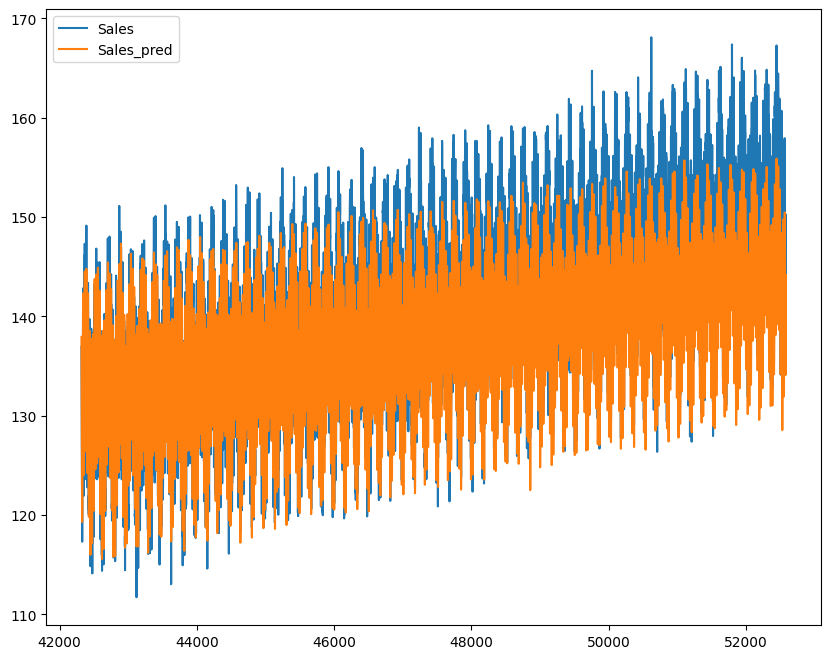

In [71]:
df_final[['Sales','Sales_pred']].plot()